# 研究

## セットアップ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd '/content/drive/MyDrive/研究'

/content/drive/MyDrive/研究


In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
!pip install torchinfo
from torchinfo import summary
from torch.autograd import Variable

from tqdm import tqdm

#

## データ

In [ ]:
RV = pd.read_csv('NK225_RV.csv')
RV

,date,1min,2min,3min,4min,5min,6min,7min,8min,9min,...,21min,22min,23min,24min,25min,26min,27min,28min,29min,30min
0,1996/3/11,0.000071,0.000102,0.000130,0.000146,0.000151,0.000160,0.000152,0.000161,0.000168,...,0.000125,0.000110,0.000128,0.000167,0.000175,0.000155,0.000137,0.000168,0.000151,0.000176
1,1996/3/12,0.000025,0.000038,0.000044,0.000049,0.000048,0.000053,0.000047,0.000058,0.000055,...,0.000043,0.000046,0.000049,0.000057,0.000047,0.000039,0.000038,0.000036,0.000044,0.000043
2,1996/3/13,0.000063,0.000089,0.000092,0.000073,0.000072,0.000077,0.000077,0.000086,0.000079,...,0.000086,0.000098,0.000094,0.000072,0.000079,0.000092,0.000108,0.000101,0.000087,0.000092
3,1996/3/14,0.000042,0.000049,0.000053,0.000062,0.000049,0.000053,0.000057,0.000068,0.000055,...,0.000054,0.000059,0.000069,0.000077,0.000069,0.000074,0.000073,0.000066,0.000063,0.000052
4,1996/3/15,0.000084,0.000100,0.000094,0.000099,0.000110,0.000116,0.000137,0.000123,0.000130,...,0.000122,0.000098,0.000120,0.000125,0.000086,0.000100,0.000088,0.000121,0.000117,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,2023/9/25,0.000026,0.000027,0.000029,0.000030,0.000022,0.000032,0.000016,0.000025,0.000032,...,0.000024,0.000024,0.000028,0.000039,0.000035,0.000034,0.000034,0.000023,0.000028,0.000021
6756,2023/9/26,0.000029,0.000027,0.000027,0.000031,0.000036,0.000031,0.000027,0.000031,0.000032,...,0.000038,0.000045,0.000039,0.000042,0.000052,0.000047,0.000049,0.000046,0.000046,0.000055
6757,2023/9/27,0.000036,0.000030,0.000035,0.000026,0.000035,0.000032,0.000033,0.000027,0.000029,...,0.000035,0.000040,0.000031,0.000021,0.000029,0.000033,0.000038,0.000027,0.000021,0.000029
6758,2023/9/28,0.000057,0.000061,0.000080,0.000073,0.000088,0.000093,0.000080,0.000107,0.000101,...,0.000082,0.000120,0.000100,0.000088,0.000135,0.000126,0.000113,0.000094,0.000082,0.000123


In [ ]:
# date列をdatetime型に変換
RV['date'] = pd.to_datetime(RV['date'])

# date列をインデックスに設定
RV.set_index('date', inplace=True)

In [ ]:
RV = 10000*RV

In [ ]:
data = RV[['5min', '30min']]

In [ ]:
data

,5min,30min
date,,
1996-03-11,1.50927,1.76196
1996-03-12,0.48000,0.43200
1996-03-13,0.72100,0.91600
1996-03-14,0.48700,0.52000
1996-03-15,1.09568,0.71100
...,...,...
2023-09-25,0.21900,0.21100
2023-09-26,0.36400,0.54600
2023-09-27,0.35200,0.28700


In [ ]:
data = data.copy()

In [ ]:
data['log_5min'] = np.log(data['5min'])
data

,5min,30min,log_5min
date,,,
1996-03-11,1.50927,1.76196,0.411626
1996-03-12,0.48000,0.43200,-0.733969
1996-03-13,0.72100,0.91600,-0.327116
1996-03-14,0.48700,0.52000,-0.719491
1996-03-15,1.09568,0.71100,0.091375
...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684
2023-09-26,0.36400,0.54600,-1.010601
2023-09-27,0.35200,0.28700,-1.044124


In [ ]:
data['log_5min_daily'] = data['log_5min'].shift(1)
data

,5min,30min,log_5min,log_5min_daily
date,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN
1996-03-12,0.48000,0.43200,-0.733969,0.411626
1996-03-13,0.72100,0.91600,-0.327116,-0.733969
1996-03-14,0.48700,0.52000,-0.719491,-0.327116
1996-03-15,1.09568,0.71100,0.091375,-0.719491
...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,-0.957113
2023-09-26,0.36400,0.54600,-1.010601,-1.518684
2023-09-27,0.35200,0.28700,-1.044124,-1.010601


In [ ]:
# 直近5つの値の移動平均を計算して5min_weekly列を作成
data['5min_weekly'] = data['5min'].rolling(window=5).mean()

# 直近22つの値の移動平均を計算して5min_monthly列を作成
data['5min_monthly'] = data['5min'].rolling(window=22).mean()
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly
date,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,0.411626,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,-0.733969,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,-0.327116,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,-0.719491,0.85859,NaN
...,...,...,...,...,...,...
2023-09-25,0.21900,0.21100,-1.518684,-0.957113,0.24360,0.303864
2023-09-26,0.36400,0.54600,-1.010601,-1.518684,0.27220,0.311500
2023-09-27,0.35200,0.28700,-1.044124,-1.010601,0.30300,0.305545


In [ ]:
data['log_5min_weekly'] = np.log(data['5min_weekly']).shift(1)
data['log_5min_monthly'] = np.log(data['5min_monthly']).shift(1)
data.head(10)

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly
date,,,,,,,,
1996-03-11,1.50927,1.76196,0.411626,NaN,NaN,NaN,NaN,NaN
1996-03-12,0.48000,0.43200,-0.733969,0.411626,NaN,NaN,NaN,NaN
1996-03-13,0.72100,0.91600,-0.327116,-0.733969,NaN,NaN,NaN,NaN
1996-03-14,0.48700,0.52000,-0.719491,-0.327116,NaN,NaN,NaN,NaN
1996-03-15,1.09568,0.71100,0.091375,-0.719491,0.858590,NaN,NaN,NaN
1996-03-18,0.66600,0.24400,-0.406466,0.091375,0.689936,NaN,-0.152464,NaN
1996-03-19,1.61955,0.92200,0.482148,-0.406466,0.917846,NaN,-0.371156,NaN
1996-03-21,0.67600,0.93000,-0.391562,0.482148,0.908846,NaN,-0.085726,NaN
1996-03-22,0.78300,0.53600,-0.244623,-0.391562,0.968046,NaN,-0.095580,NaN


In [ ]:
data = data.dropna()
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly
date,,,,,,,,
1996-04-11,0.477,0.36200,-0.740239,-1.560648,0.4740,0.771495,-0.746126,-0.200384
1996-04-12,0.815,0.70800,-0.204567,-0.740239,0.4860,0.786723,-0.746548,-0.259424
1996-04-15,0.524,0.65600,-0.646264,-0.204567,0.5272,0.777768,-0.721547,-0.239879
1996-04-16,0.606,0.51500,-0.500875,-0.646264,0.5264,0.783177,-0.640175,-0.251327
1996-04-17,0.220,0.34400,-1.514128,-0.500875,0.5284,0.743374,-0.641694,-0.244396
...,...,...,...,...,...,...,...,...
2023-09-25,0.219,0.21100,-1.518684,-0.957113,0.2436,0.303864,-1.363359,-1.190728
2023-09-26,0.364,0.54600,-1.010601,-1.518684,0.2722,0.311500,-1.412228,-1.191176
2023-09-27,0.352,0.28700,-1.044124,-1.010601,0.3030,0.305545,-1.301218,-1.166356


In [ ]:
Return = pd.read_csv('NK225_Return.csv')
Return

,date,return
0,1996/4/10,0.218349
1,1996/4/11,-0.447362
2,1996/4/12,-0.156661
3,1996/4/15,1.022297
4,1996/4/16,-0.067975
...,...,...
6734,2023/9/25,0.848824
6735,2023/9/26,-1.118798
6736,2023/9/27,0.175770
6737,2023/9/28,-1.554657


In [ ]:
# date列をdatetime型に変換
Return['date'] = pd.to_datetime(Return['date'])

# date列をインデックスに設定
Return.set_index('date', inplace=True)

In [ ]:
Return['return_abs'] = Return['return'].abs()

Return['return_dummy'] = (Return['return'] < 0).astype(int)

Return['return_abs_times_dummy'] = Return['return_abs'] * Return['return_dummy']

In [ ]:
data = pd.merge(data, Return, left_index=True, right_index=True)
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly,return,return_abs,return_dummy,return_abs_times_dummy
date,,,,,,,,,,,,
1996-04-11,0.477,0.36200,-0.740239,-1.560648,0.4740,0.771495,-0.746126,-0.200384,-0.447362,0.447362,1,0.447362
1996-04-12,0.815,0.70800,-0.204567,-0.740239,0.4860,0.786723,-0.746548,-0.259424,-0.156661,0.156661,1,0.156661
1996-04-15,0.524,0.65600,-0.646264,-0.204567,0.5272,0.777768,-0.721547,-0.239879,1.022297,1.022297,0,0.000000
1996-04-16,0.606,0.51500,-0.500875,-0.646264,0.5264,0.783177,-0.640175,-0.251327,-0.067975,0.067975,1,0.067975
1996-04-17,0.220,0.34400,-1.514128,-0.500875,0.5284,0.743374,-0.641694,-0.244396,-0.237843,0.237843,1,0.237843
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.219,0.21100,-1.518684,-0.957113,0.2436,0.303864,-1.363359,-1.190728,0.848824,0.848824,0,0.000000
2023-09-26,0.364,0.54600,-1.010601,-1.518684,0.2722,0.311500,-1.412228,-1.191176,-1.118798,1.118798,1,1.118798
2023-09-27,0.352,0.28700,-1.044124,-1.010601,0.3030,0.305545,-1.301218,-1.166356,0.175770,0.175770,0,0.000000


## モデル

### HARモデル

In [ ]:
df = data[['log_5min', 'log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]
df

,log_5min,log_5min_daily,log_5min_weekly,log_5min_monthly,return_abs,return_abs_times_dummy
date,,,,,,
1996-04-11,-0.740239,-1.560648,-0.746126,-0.200384,0.447362,0.447362
1996-04-12,-0.204567,-0.740239,-0.746548,-0.259424,0.156661,0.156661
1996-04-15,-0.646264,-0.204567,-0.721547,-0.239879,1.022297,0.000000
1996-04-16,-0.500875,-0.646264,-0.640175,-0.251327,0.067975,0.067975
1996-04-17,-1.514128,-0.500875,-0.641694,-0.244396,0.237843,0.237843
...,...,...,...,...,...,...
2023-09-25,-1.518684,-0.957113,-1.363359,-1.190728,0.848824,0.000000
2023-09-26,-1.010601,-1.518684,-1.412228,-1.191176,1.118798,1.118798
2023-09-27,-1.044124,-1.010601,-1.301218,-1.166356,0.175770,0.000000


In [ ]:
train, test = train_test_split(df, test_size=0.3, shuffle=False)

In [ ]:
X_train = train[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]
y_train = train['log_5min']
X_test = test[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]
y_test = test['log_5min']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train['log_5min_pred'] = model.predict(X_train)

In [ ]:
test['log_5min_pred'] = model.predict(X_test)

In [ ]:
# 残差の計算
residuals = train['log_5min'] - train['log_5min_pred']
# 残差の分散を計算
sigma2 = np.var(residuals, ddof=1)  # ddof=1 で不偏分散を計算
sigma2

0.21390536735178606

In [ ]:
Pred = pd.concat([
    train['log_5min_pred'].reset_index(drop=True),
    test['log_5min_pred'].reset_index(drop=True)
], axis=0).reset_index(drop=True)

Pred = np.exp(Pred + 0.5 * sigma2)
Pred = pd.Series(list(Pred), index=df.index)
Pred

,0
date,
1996-04-11,0.429930
1996-04-12,0.513872
1996-04-15,0.668818
1996-04-16,0.537922
1996-04-17,0.584559
...,...
2023-09-25,0.345975
2023-09-26,0.330828
2023-09-27,0.322529


In [ ]:
data['pred_HAR'] = Pred

In [ ]:
train_size = len(train)
test_size = len(test)
print(train_size)
print(test_size)

4716
2022


In [ ]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:
mse = mean_squared_error(test_data['5min'], test_data['pred_HAR'])
mse

0.9397077325260379

In [ ]:
# Q-LIKEを計算する関数の定義
def q_like(actual, predicted):
    """
    Q-LIKE指標を計算する関数
    :param actual: 実測値 (numpy array or pandas Series)
    :param predicted: 予測値 (numpy array or pandas Series)
    :return: Q-LIKE
    """
    return np.mean(np.log(predicted) + (actual / predicted))

In [ ]:
qlike = q_like(test_data['5min'], test_data['pred_HAR'])
qlike

0.18111736371800896

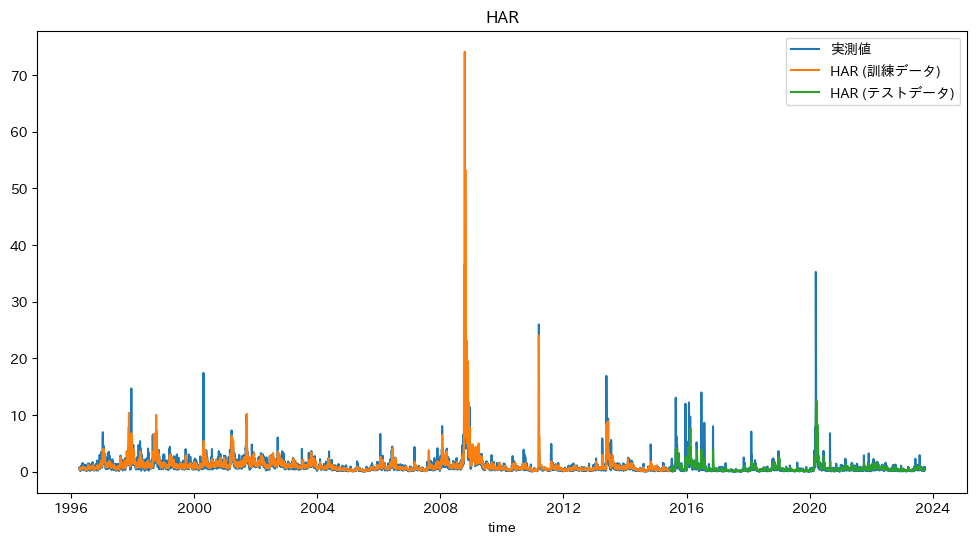

In [ ]:
time = data.index

# 時系列プロットの作成
plt.figure(figsize=(12, 6))
plt.plot(data['5min'], label='実測値')
plt.plot(train_data['pred_HAR'], label='HAR (訓練データ)')
plt.plot(test_data['pred_HAR'], label='HAR (テストデータ)')
plt.xlabel('time')
plt.title('HAR')
plt.legend()
plt.show()

### LSTM

In [ ]:
# 特徴量と目的変数に分ける
X = data[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']].values
y = data[['log_5min']].values

In [ ]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [ ]:
# スケーリング
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [ ]:
# Dataset作成
train_dataset = TimeSeriesDataset(X_train_scaled, y_train_scaled)
test_dataset = TimeSeriesDataset(X_test_scaled, y_test_scaled)

# DataLoader作成
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x.unsqueeze(1))  # (batch_size, seq_len=1, input_size)
        out = self.fc(out[:, -1, :])       # (batch_size, output_size)
        return out

input_size = X_train.shape[1]
hidden_size = 50
num_layers = 1
output_size = 1

model = LSTM(input_size, hidden_size, num_layers, output_size)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

cuda:0


In [ ]:
# エポックごとの損失を記録するリスト
loss_history = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for features, targets in pbar:
            features, targets = features.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            pbar.set_postfix(loss=epoch_loss / len(train_loader))  # 損失を進捗バーに表示

    average_loss = epoch_loss / len(train_loader)  # エポックごとの平均損失
    loss_history.append(average_loss)  # 損失をリストに追加

Epoch 100/100: 100%|██████████| 1179/1179 [00:06<00:00, 179.02batch/s, loss=0.00482]


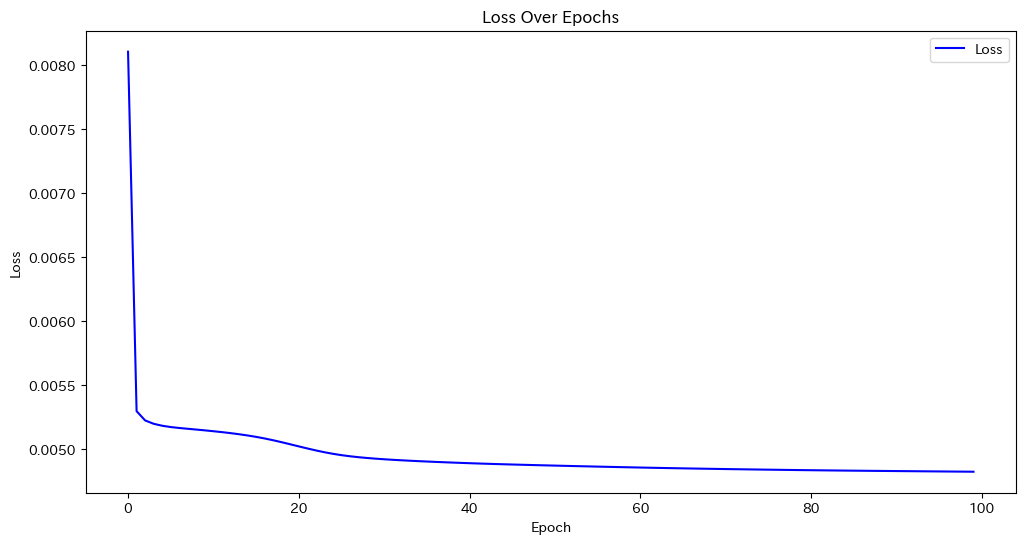

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label="Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

In [ ]:
def predict(model, loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for features, _ in loader:
            features = features.to(device)
            outputs = model(features)
            predictions.extend(outputs.cpu().numpy())

    return np.array(predictions)

In [ ]:
train_predictions_scaled = predict(model, train_loader)
test_predictions_scaled = predict(model, test_loader)

train_predictions = scaler_y.inverse_transform(train_predictions_scaled)
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)

In [ ]:
train_series = pd.Series(train_predictions.flatten(), name="log_5min_pred")
test_series = pd.Series(test_predictions.flatten(), name="log_5min_pred")

# train と test の予測結果を連結
Pred = pd.concat([
    train_series.reset_index(drop=True),
    test_series.reset_index(drop=True)
], axis=0).reset_index(drop=True)

Pred = np.exp(Pred + 0.5 * sigma2)
Pred = pd.Series(list(Pred), index=df.index)
Pred

,0
date,
1996-04-11,0.370399
1996-04-12,0.439681
1996-04-15,0.529070
1996-04-16,0.464464
1996-04-17,0.498705
...,...
2023-09-25,0.301657
2023-09-26,0.362547
2023-09-27,0.294595


In [ ]:
data['pred_LSTM'] = Pred

In [ ]:
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly,return,return_abs,return_dummy,return_abs_times_dummy,pred_HAR,pred_LSTM
date,,,,,,,,,,,,,,
1996-04-11,0.477,0.36200,-0.740239,-1.560648,0.4740,0.771495,-0.746126,-0.200384,-0.447362,0.447362,1,0.447362,0.429930,0.370399
1996-04-12,0.815,0.70800,-0.204567,-0.740239,0.4860,0.786723,-0.746548,-0.259424,-0.156661,0.156661,1,0.156661,0.513872,0.439681
1996-04-15,0.524,0.65600,-0.646264,-0.204567,0.5272,0.777768,-0.721547,-0.239879,1.022297,1.022297,0,0.000000,0.668818,0.529070
1996-04-16,0.606,0.51500,-0.500875,-0.646264,0.5264,0.783177,-0.640175,-0.251327,-0.067975,0.067975,1,0.067975,0.537922,0.464464
1996-04-17,0.220,0.34400,-1.514128,-0.500875,0.5284,0.743374,-0.641694,-0.244396,-0.237843,0.237843,1,0.237843,0.584559,0.498705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.219,0.21100,-1.518684,-0.957113,0.2436,0.303864,-1.363359,-1.190728,0.848824,0.848824,0,0.000000,0.345975,0.301657
2023-09-26,0.364,0.54600,-1.010601,-1.518684,0.2722,0.311500,-1.412228,-1.191176,-1.118798,1.118798,1,1.118798,0.330828,0.362547
2023-09-27,0.352,0.28700,-1.044124,-1.010601,0.3030,0.305545,-1.301218,-1.166356,0.175770,0.175770,0,0.000000,0.322529,0.294595


In [ ]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:
mse = mean_squared_error(test_data['5min'], test_data['pred_LSTM'])
mse

1.060681994425785

In [ ]:
qlike = q_like(test_data['5min'], test_data['pred_LSTM'])
qlike

0.1661631970457687

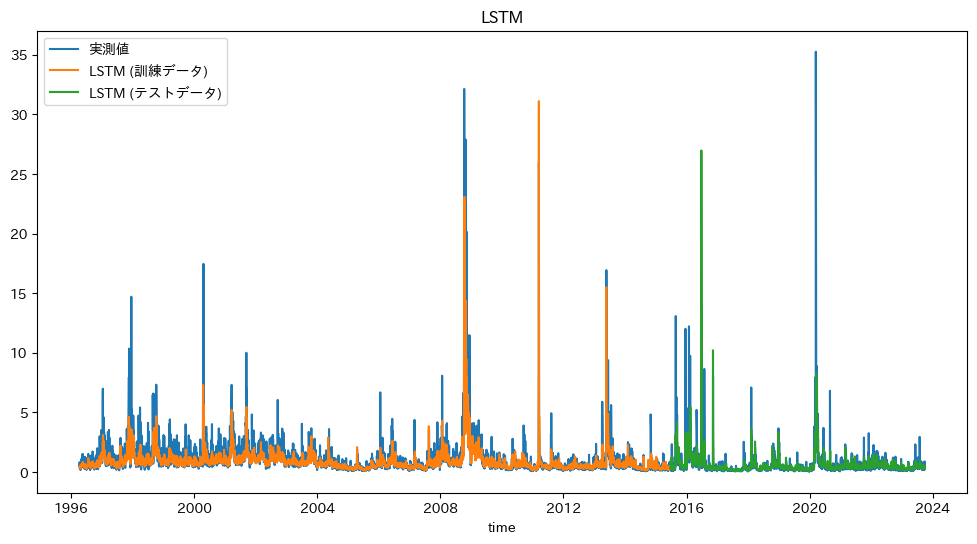

In [ ]:
time = data.index

# 時系列プロットの作成
plt.figure(figsize=(12, 6))
plt.plot(data['5min'], label='実測値')
plt.plot(train_data['pred_LSTM'], label='LSTM (訓練データ)')
plt.plot(test_data['pred_LSTM'], label='LSTM (テストデータ)')
plt.xlabel('time')
plt.title('LSTM')
plt.legend()
plt.show()

### ハイブリッドモデル

**残差型**

In [ ]:
df = data[['log_5min', 'log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]

In [ ]:
# データを分割
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=False)

In [ ]:
X_train = train[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]
y_train = train['log_5min']
X_test = test[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']]
y_test = test['log_5min']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train['HAR_pred'] = model.predict(X_train)

In [ ]:
train['HAR_pred'] = model.predict(X_train)
train['residual'] = y_train - train['HAR_pred']
test['HAR_pred'] = model.predict(X_test)
test['residual'] = y_test - test['HAR_pred']

In [ ]:
train

,log_5min,log_5min_daily,log_5min_weekly,log_5min_monthly,return_abs,return_abs_times_dummy,HAR_pred,residual
date,,,,,,,,
1996-04-11,-0.740239,-1.560648,-0.746126,-0.200384,0.447362,0.447362,-0.951085,0.210846
1996-04-12,-0.204567,-0.740239,-0.746548,-0.259424,0.156661,0.156661,-0.772734,0.568167
1996-04-15,-0.646264,-0.204567,-0.721547,-0.239879,1.022297,0.000000,-0.509196,-0.137068
1996-04-16,-0.500875,-0.646264,-0.640175,-0.251327,0.067975,0.067975,-0.726995,0.226119
1996-04-17,-1.514128,-0.500875,-0.641694,-0.244396,0.237843,0.237843,-0.643850,-0.870278
...,...,...,...,...,...,...,...,...
2015-06-16,-0.959720,-1.382302,-0.946235,-1.395225,0.638938,0.638938,-1.168084,0.208364
2015-06-17,-1.294627,-0.959720,-0.854725,-1.382284,0.191071,0.191071,-1.102729,-0.191898
2015-06-18,-0.891598,-1.294627,-1.147592,-1.358485,1.136294,1.136294,-1.089472,0.197874


In [ ]:
# 特徴量と目的変数に分ける
X_train = train[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']].values
y_train = train[['residual']].values
X_test = test[['log_5min_daily', 'log_5min_weekly', 'log_5min_monthly', 'return_abs', 'return_abs_times_dummy']].values
y_test = test[['residual']].values

In [ ]:
# スケーリング
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
# Dataset作成
train_dataset = TimeSeriesDataset(X_train_scaled, y_train_scaled)
test_dataset = TimeSeriesDataset(X_test_scaled, y_test_scaled)

# DataLoader作成
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 50
num_layers = 1
output_size = 1

model = LSTM(input_size, hidden_size, num_layers, output_size)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

cuda:0


In [ ]:
# エポックごとの損失を記録するリスト
loss_history = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for features, targets in pbar:
            features, targets = features.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            pbar.set_postfix(loss=epoch_loss / len(train_loader))  # 損失を進捗バーに表示

    average_loss = epoch_loss / len(train_loader)  # エポックごとの平均損失
    loss_history.append(average_loss)  # 損失をリストに追加

Epoch 100/100: 100%|██████████| 1179/1179 [00:06<00:00, 173.38batch/s, loss=0.0102]


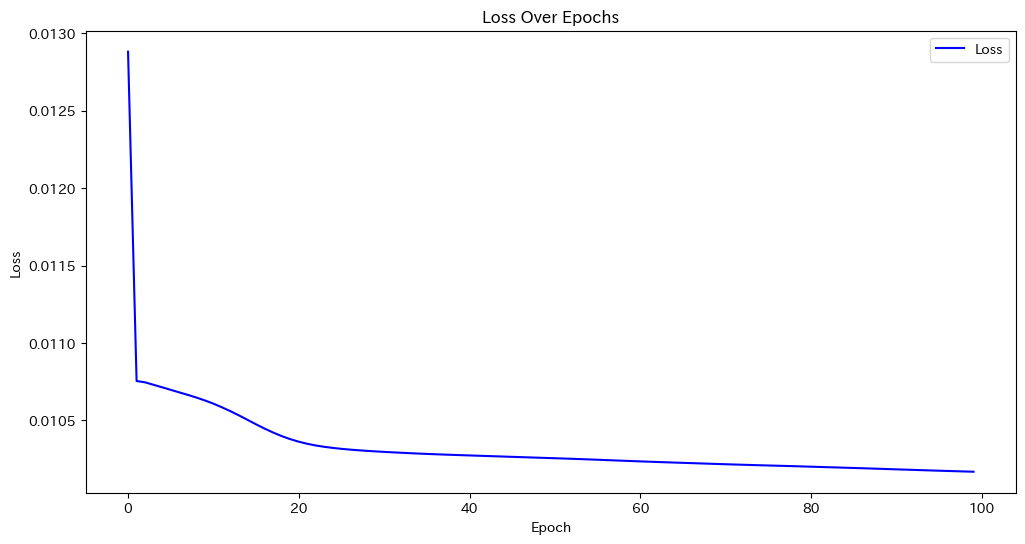

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label="Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

In [ ]:
train_predictions_scaled = predict(model, train_loader)
test_predictions_scaled = predict(model, test_loader)

train_predictions = scaler_y.inverse_transform(train_predictions_scaled)
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)

In [ ]:
type(train_predictions)

numpy.ndarray

In [ ]:
train['LSTM_pred'] = train_predictions.flatten()
test['LSTM_pred'] = test_predictions.flatten()

In [ ]:
train

,log_5min,log_5min_daily,log_5min_weekly,log_5min_monthly,return_abs,return_abs_times_dummy,HAR_pred,residual,LSTM_pred
date,,,,,,,,,
1996-04-11,-0.740239,-1.560648,-0.746126,-0.200384,0.447362,0.447362,-0.951085,0.210846,-0.141528
1996-04-12,-0.204567,-0.740239,-0.746548,-0.259424,0.156661,0.156661,-0.772734,0.568167,-0.122585
1996-04-15,-0.646264,-0.204567,-0.721547,-0.239879,1.022297,0.000000,-0.509196,-0.137068,-0.192916
1996-04-16,-0.500875,-0.646264,-0.640175,-0.251327,0.067975,0.067975,-0.726995,0.226119,-0.107569
1996-04-17,-1.514128,-0.500875,-0.641694,-0.244396,0.237843,0.237843,-0.643850,-0.870278,-0.121420
...,...,...,...,...,...,...,...,...,...
2015-06-16,-0.959720,-1.382302,-0.946235,-1.395225,0.638938,0.638938,-1.168084,0.208364,-0.011085
2015-06-17,-1.294627,-0.959720,-0.854725,-1.382284,0.191071,0.191071,-1.102729,-0.191898,-0.026566
2015-06-18,-0.891598,-1.294627,-1.147592,-1.358485,1.136294,1.136294,-1.089472,0.197874,0.062622


In [ ]:
train['log_5min_pred'] = train['HAR_pred'] + train['LSTM_pred']
test['log_5min_pred'] = test['HAR_pred'] + test['LSTM_pred']

In [ ]:
# train と test の予測結果を連結
Pred = pd.concat([
    train['log_5min_pred'].reset_index(drop=True),
    test['log_5min_pred'].reset_index(drop=True)
], axis=0).reset_index(drop=True)

Pred = np.exp(Pred + 0.5 * sigma2)
Pred = pd.Series(list(Pred), index=df.index)
Pred

,0
date,
1996-04-11,0.373193
1996-04-12,0.454587
1996-04-15,0.551475
1996-04-16,0.483062
1996-04-17,0.517722
...,...
2023-09-25,0.292459
2023-09-26,0.351818
2023-09-27,0.294361


In [ ]:
data['pred_hybrid1'] = Pred

In [ ]:
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly,return,return_abs,return_dummy,return_abs_times_dummy,pred_HAR,pred_LSTM,pred_hybrid1
date,,,,,,,,,,,,,,,
1996-04-11,0.477,0.36200,-0.740239,-1.560648,0.4740,0.771495,-0.746126,-0.200384,-0.447362,0.447362,1,0.447362,0.429930,0.370399,0.373193
1996-04-12,0.815,0.70800,-0.204567,-0.740239,0.4860,0.786723,-0.746548,-0.259424,-0.156661,0.156661,1,0.156661,0.513872,0.439681,0.454587
1996-04-15,0.524,0.65600,-0.646264,-0.204567,0.5272,0.777768,-0.721547,-0.239879,1.022297,1.022297,0,0.000000,0.668818,0.529070,0.551475
1996-04-16,0.606,0.51500,-0.500875,-0.646264,0.5264,0.783177,-0.640175,-0.251327,-0.067975,0.067975,1,0.067975,0.537922,0.464464,0.483062
1996-04-17,0.220,0.34400,-1.514128,-0.500875,0.5284,0.743374,-0.641694,-0.244396,-0.237843,0.237843,1,0.237843,0.584559,0.498705,0.517722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.219,0.21100,-1.518684,-0.957113,0.2436,0.303864,-1.363359,-1.190728,0.848824,0.848824,0,0.000000,0.345975,0.301657,0.292459
2023-09-26,0.364,0.54600,-1.010601,-1.518684,0.2722,0.311500,-1.412228,-1.191176,-1.118798,1.118798,1,1.118798,0.330828,0.362547,0.351818
2023-09-27,0.352,0.28700,-1.044124,-1.010601,0.3030,0.305545,-1.301218,-1.166356,0.175770,0.175770,0,0.000000,0.322529,0.294595,0.294361


In [ ]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:
mse = mean_squared_error(test_data['5min'], test_data['pred_hybrid1'])
mse

1.0013006060796357

In [ ]:
qlike = q_like(test_data['5min'], test_data['pred_hybrid1'])
qlike

0.16471910422998318

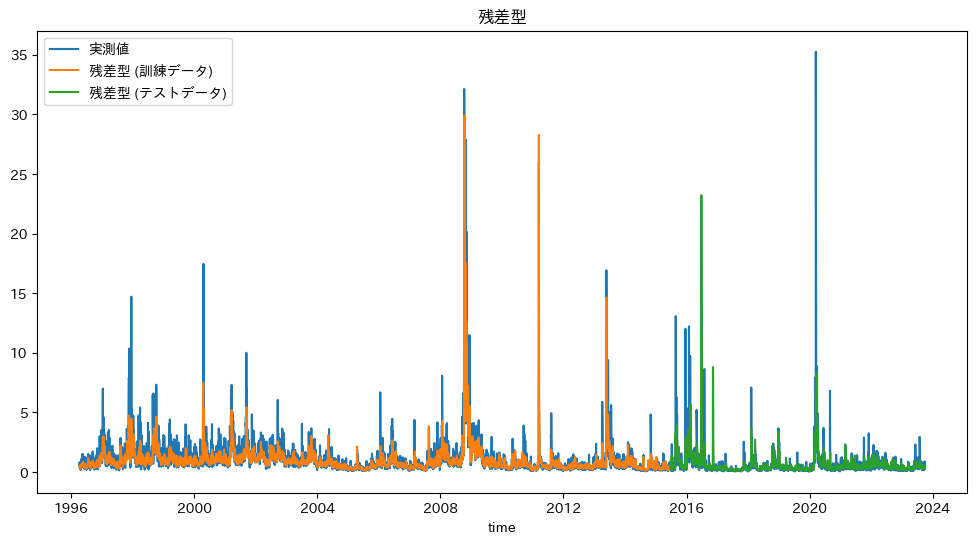

In [ ]:
time = data.index

# 時系列プロットの作成
plt.figure(figsize=(12, 6))
plt.plot(data['5min'], label='実測値')
plt.plot(train_data['pred_hybrid1'], label='残差型 (訓練データ)')
plt.plot(test_data['pred_hybrid1'], label='残差型 (テストデータ)')
plt.xlabel('time')
plt.title('残差型')
plt.legend()
plt.show()

**重み付け型**

In [ ]:
mse_HAR = mean_squared_error(train_data['5min'], train_data['pred_HAR'])
mse_LSTM = mean_squared_error(train_data['5min'], train_data['pred_LSTM'])

In [ ]:
print(mse_HAR)
print(mse_LSTM)

2.0655962974164743
1.017397832362707


In [ ]:
# 重みの計算
w1 = (1 / mse_HAR) / (1 / mse_HAR + 1 / mse_LSTM)
w2 = (1 / mse_LSTM) / (1 / mse_HAR + 1 / mse_LSTM)

In [ ]:
print(w1)
print(w2)

0.3300031688466361
0.6699968311533638


In [ ]:
data['pred_hybrid2'] = w1 * data['pred_HAR'] + w2 * data['pred_LSTM']
data

,5min,30min,log_5min,log_5min_daily,5min_weekly,5min_monthly,log_5min_weekly,log_5min_monthly,return,return_abs,return_dummy,return_abs_times_dummy,pred_HAR,pred_LSTM,pred_hybrid1,pred_hybrid2
date,,,,,,,,,,,,,,,,
1996-04-11,0.477,0.36200,-0.740239,-1.560648,0.4740,0.771495,-0.746126,-0.200384,-0.447362,0.447362,1,0.447362,0.429930,0.370399,0.373193,0.390045
1996-04-12,0.815,0.70800,-0.204567,-0.740239,0.4860,0.786723,-0.746548,-0.259424,-0.156661,0.156661,1,0.156661,0.513872,0.439681,0.454587,0.464164
1996-04-15,0.524,0.65600,-0.646264,-0.204567,0.5272,0.777768,-0.721547,-0.239879,1.022297,1.022297,0,0.000000,0.668818,0.529070,0.551475,0.575187
1996-04-16,0.606,0.51500,-0.500875,-0.646264,0.5264,0.783177,-0.640175,-0.251327,-0.067975,0.067975,1,0.067975,0.537922,0.464464,0.483062,0.488705
1996-04-17,0.220,0.34400,-1.514128,-0.500875,0.5284,0.743374,-0.641694,-0.244396,-0.237843,0.237843,1,0.237843,0.584559,0.498705,0.517722,0.527037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.219,0.21100,-1.518684,-0.957113,0.2436,0.303864,-1.363359,-1.190728,0.848824,0.848824,0,0.000000,0.345975,0.301657,0.292459,0.316282
2023-09-26,0.364,0.54600,-1.010601,-1.518684,0.2722,0.311500,-1.412228,-1.191176,-1.118798,1.118798,1,1.118798,0.330828,0.362547,0.351818,0.352080
2023-09-27,0.352,0.28700,-1.044124,-1.010601,0.3030,0.305545,-1.301218,-1.166356,0.175770,0.175770,0,0.000000,0.322529,0.294595,0.294361,0.303813


In [ ]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:
mse = mean_squared_error(test_data['5min'], test_data['pred_hybrid2'])
mse

0.9136949883947956

In [ ]:
qlike = q_like(test_data['5min'], test_data['pred_hybrid2'])
qlike

0.1652934024732349

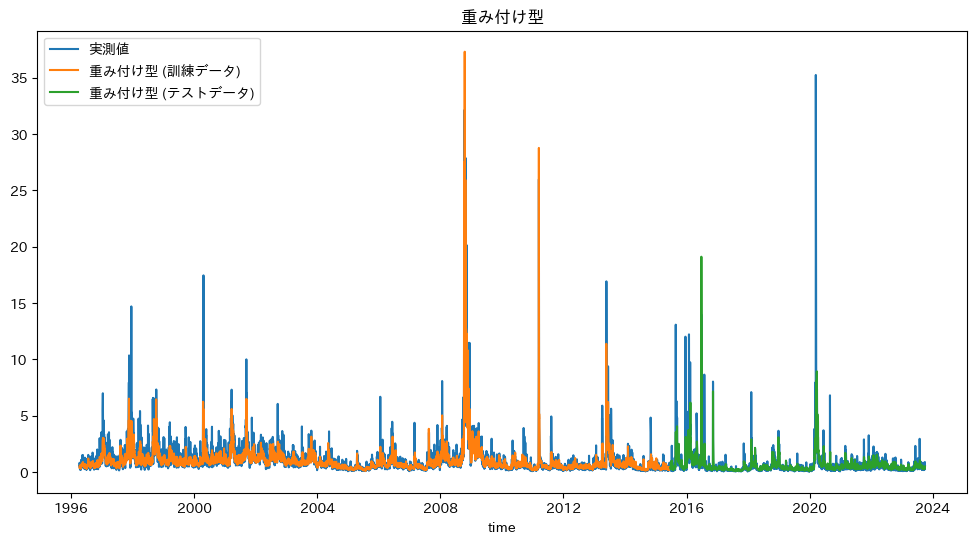

In [ ]:
time = data.index

# 時系列プロットの作成
plt.figure(figsize=(12, 6))
plt.plot(data['5min'], label='実測値')
plt.plot(train_data['pred_hybrid2'], label='重み付け型 (訓練データ)')
plt.plot(test_data['pred_hybrid2'], label='重み付け型 (テストデータ)')
plt.xlabel('time')
plt.title('重み付け型')
plt.legend()
plt.show()